# *Uso de datos de tesis de licenciatura*

## Victor Octavio Siles Ramos

- Considere hacer dos analisis de dos conjuntos de datos que comprende los que yo recopile durante mi tesis de licenciatura y tambien de datos que por el momento son preliminares para mi tesis de maestria.
- Aqui tuve la intencion de poner en practica lo ultimo que se avanzo en lo que respecta al manejo de datos de un dataframe y tambien al diseño de graficos para que esten acorde a una publicacion.
- Tambien hize algunas pruebas estadisticas basados en los supuestos generales que se siguen en torno al comportamiento de los datos que tenian

In [1]:
# Para empezar hago una entrada de las librerias

import pandas as cs
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import shapiro, levene
from scipy.stats import mannwhitneyu
from sklearn.decomposition import PCA
 

In [2]:
# Importo mis datos en formato .csv
tola = cs.read_csv('/home/siles/comparar/InicioV/TodoCA.csv', sep =',') 
tola.head() # mostrar las primeras 5 filas de la base de datos

,Nro,Fosfatasa,Glucosidasa,Respirometria,MBC,MBP,pH,CE,Maceta,Mes,Tratamiento
0,1,121.84,61.70,5.81,339.76,5.88,6.89,149.1,1C,Enero,CBt
1,2,147.39,60.27,7.06,566.21,3.88,6.99,183.7,2C,Enero,CBt
2,3,136.36,62.31,4.26,346.47,1.11,6.92,224.7,3C,Enero,CBt
3,4,130.93,59.63,6.03,289.70,0.79,6.96,172.5,4C,Enero,CBt
4,5,137.60,64.34,8.41,164.97,0.14,6.88,217.0,5C,Enero,CBt


In [3]:
tola.info() #informacion de los datos
tola.describe() #Est descriptivos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nro             70 non-null     int64  
 1   Fosfatasa       70 non-null     float64
 2   Glucosidasa     70 non-null     float64
 3   Respirometria   70 non-null     float64
 4   MBC             70 non-null     float64
 5   MBP             70 non-null     float64
 6   pH              70 non-null     float64
 7   CE              70 non-null     float64
 8   Maceta          70 non-null     object 
 9   Mes             70 non-null     object 
 10  Tratamiento     70 non-null     object 
dtypes: float64(7), int64(1), object(3)
memory usage: 6.1+ KB


,Nro,Fosfatasa,Glucosidasa,Respirometria,MBC,MBP,pH,CE
count,70.000000,70.000000,70.000000,70.000000,70.00000,70.000000,70.000000,70.000000
mean,35.500000,131.452429,65.455286,5.494857,426.23800,4.272714,6.899286,173.390000
std,20.351085,24.290808,27.205049,1.326284,260.55376,3.503641,0.195169,33.134225
min,1.000000,82.890000,19.020000,1.940000,1.80000,0.140000,6.410000,117.300000
25%,18.250000,112.797500,53.070000,4.840000,230.52000,1.437500,6.792500,149.200000
50%,35.500000,131.740000,62.150000,5.655000,378.95000,3.375000,6.920000,166.750000
75%,52.750000,142.662500,77.720000,6.202500,593.85750,6.365000,7.027500,188.250000
max,70.000000,204.050000,123.180000,8.590000,1239.50000,18.050000,7.260000,267.300000


## Primero pongo a prueba un grafico de dispersion para dos variables luego hago una matriz de dispersion

Utilizo una variable como Fosfatasa y otra como pH para la visualizacion, despues hago la matriz de dispersión

In [4]:
# Reviso todas las columnas que esta en mi DataFrame y hago una correcion de espacios ya que antes me salia error
tola.columns = tola.columns.str.strip()
print(tola.columns)

Index(['Nro', 'Fosfatasa', 'Glucosidasa', 'Respirometria', 'MBC', 'MBP', 'pH',
       'CE', 'Maceta', 'Mes', 'Tratamiento'],
      dtype='object')


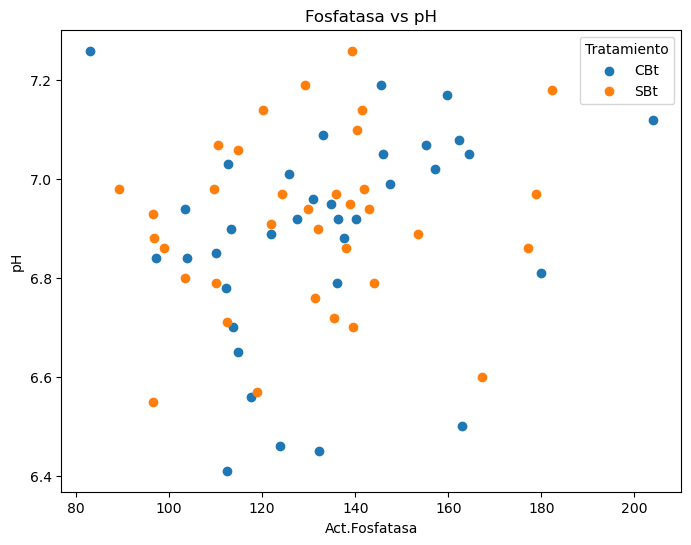

In [5]:
# Gráfico de dispersión para dos características

plt.figure(figsize=(8, 6)) # llamo a la funcion plt y digo a crear la figura de tamaño de 8x6
for Tratamiento in tola['Tratamiento'].unique():
    subset = tola[tola['Tratamiento'] == Tratamiento] # sub set me separa por especies
    plt.scatter(subset['Fosfatasa'], subset['pH'], label=Tratamiento) # definir el grafico de dispersion

# Personalización
plt.title("Fosfatasa vs pH")
plt.xlabel("Act.Fosfatasa") # fontsize es para tamaño de letra
plt.ylabel("pH")
plt.legend(title="Tratamiento") # poner loc = upper o lower left para modificar posicion de leyenda
plt.show()

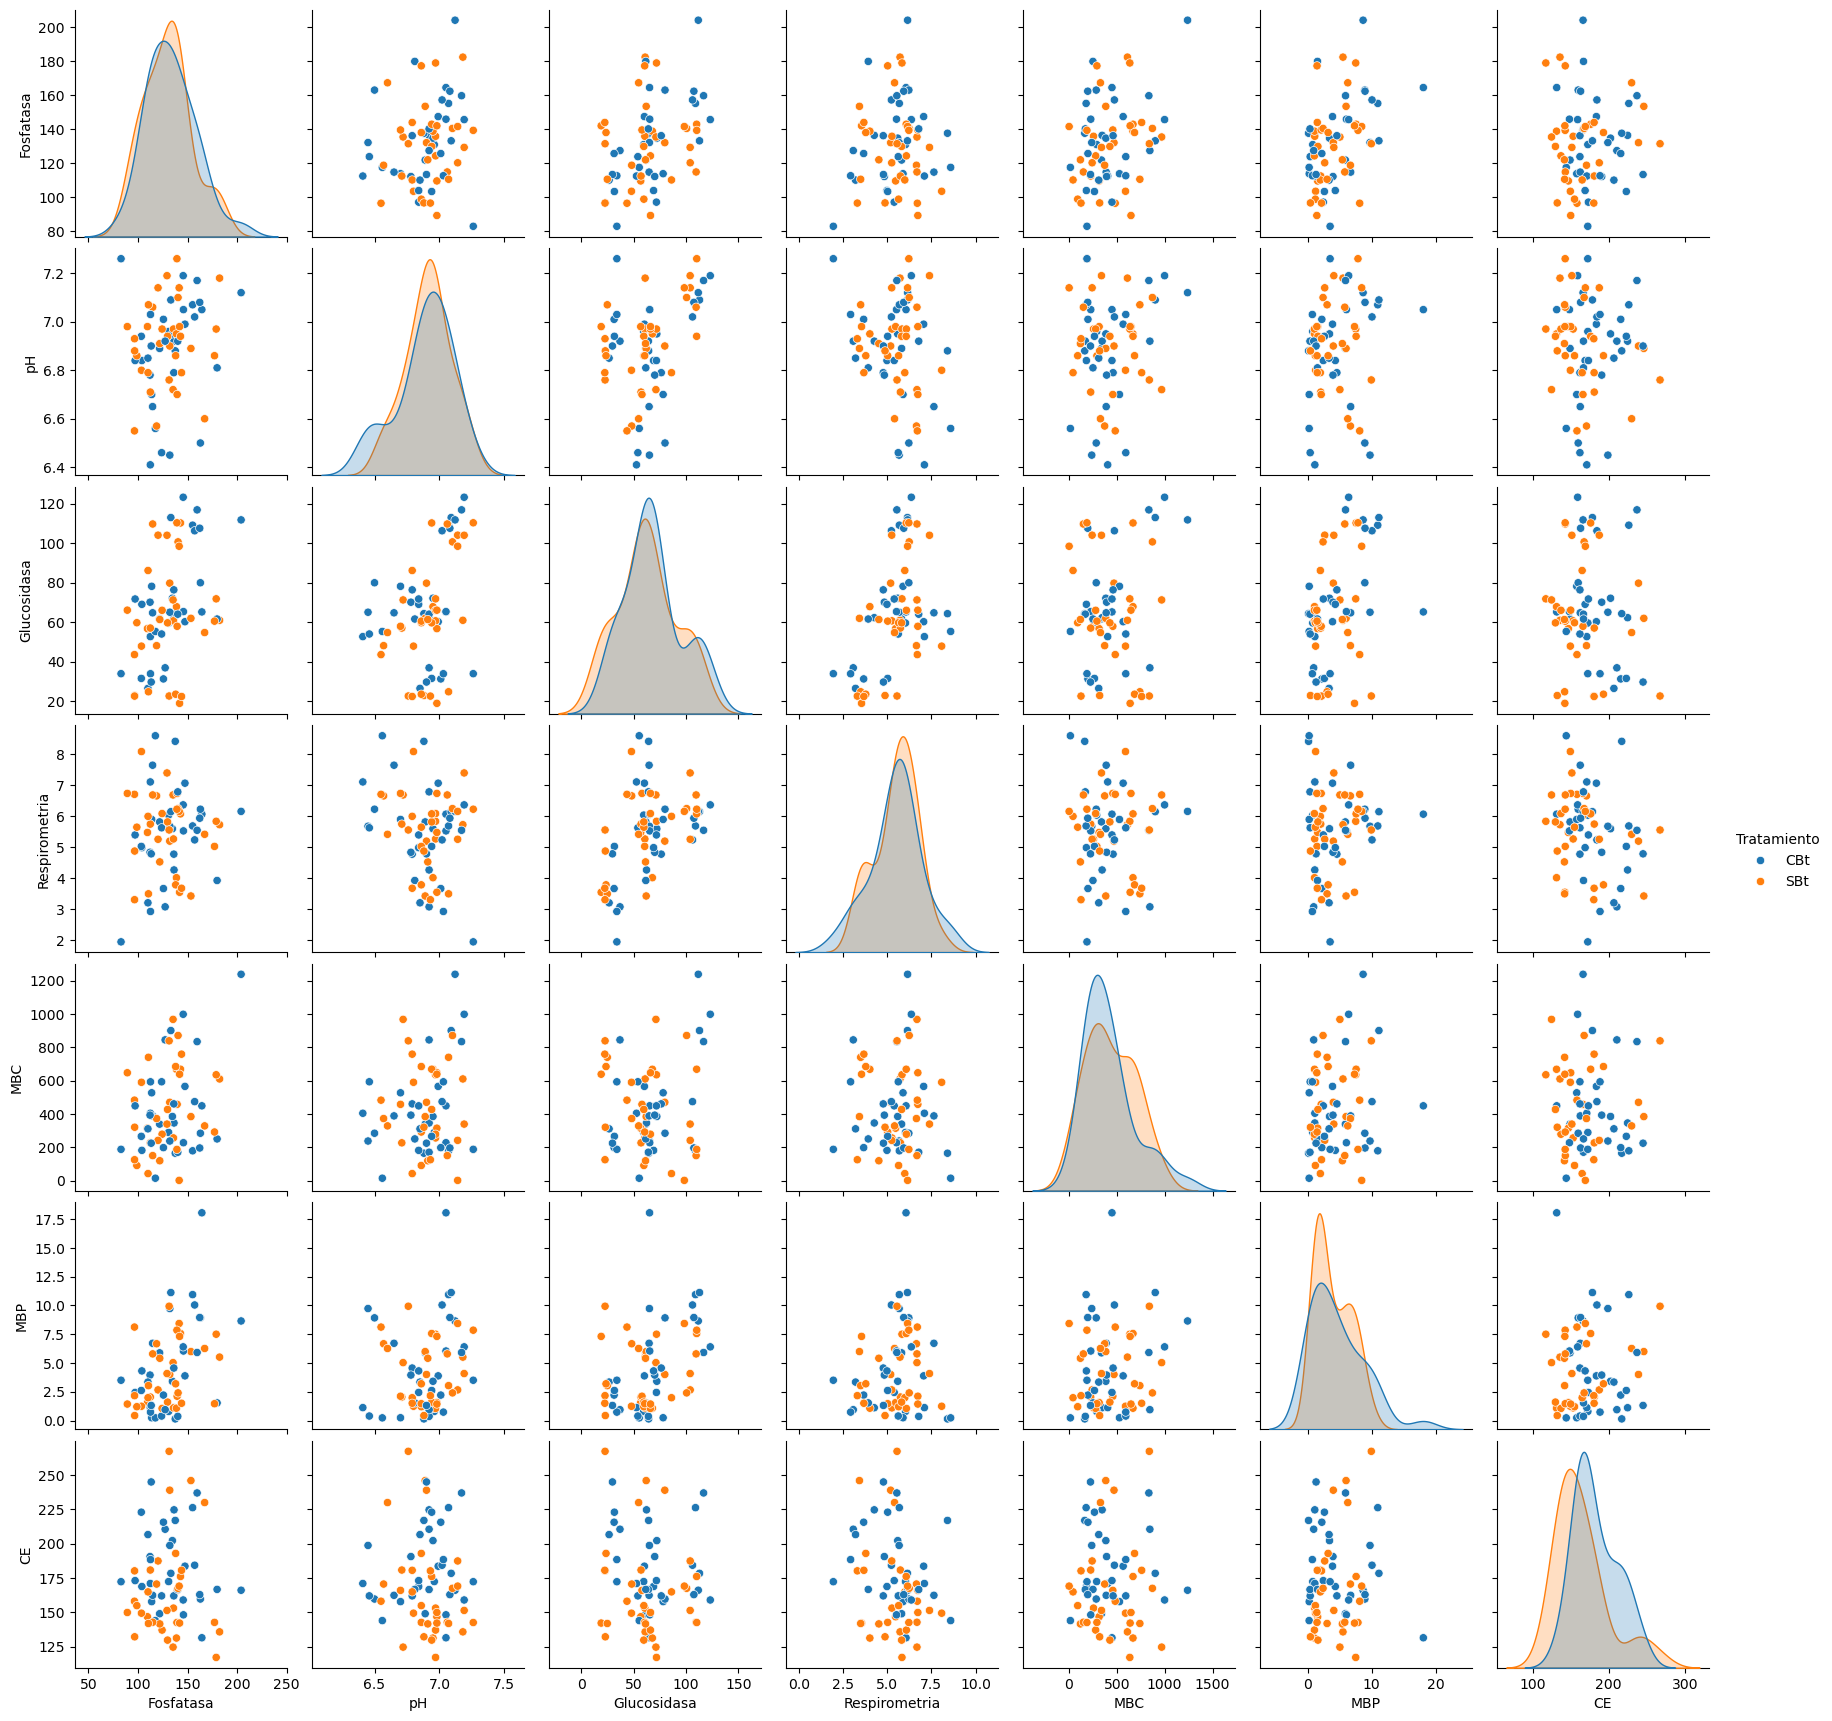

In [6]:
# Selecciono las columnas de interés 

vars_of_interest = ['Fosfatasa', 'pH', 'Glucosidasa', 'Respirometria', 'MBC', 'MBP', 'CE'] 

# Exporto una matriz de graficos de dispersión 
sns.pairplot(tola, vars=vars_of_interest, hue='Tratamiento') 

# Mostrar el gráfico 
plt.show()

## Aqui hago boxplots de cada variable para cada tratamiento con plantines y sin plantines

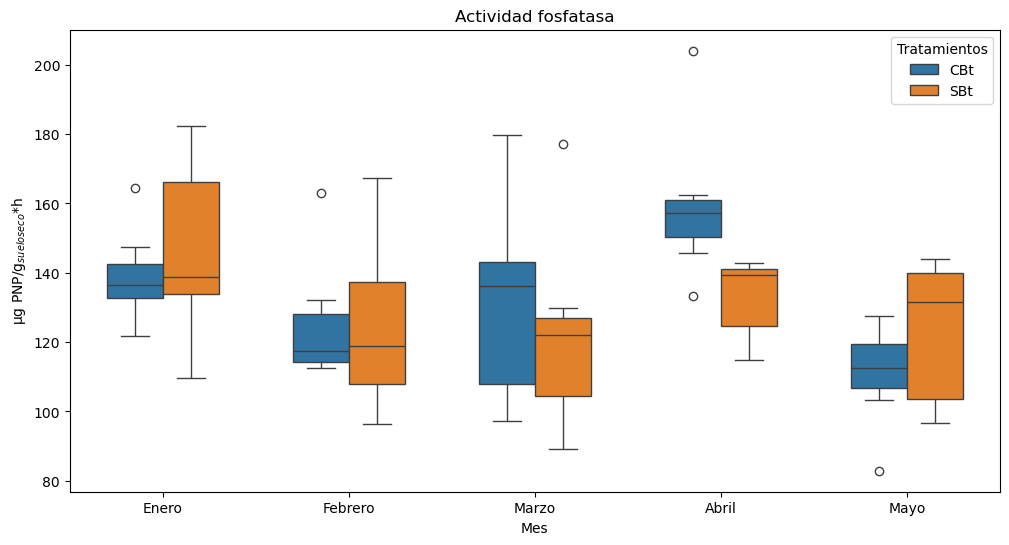

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=tola, x='Mes', y='Fosfatasa', hue='Tratamiento', dodge = True, width = 0.6) 

def my_formatter(x, _): 
    return tola['Mes'].unique()[int(x) % len(tola['Mes'].unique())] 
plt.gca().xaxis.set_major_formatter(FuncFormatter(my_formatter))

# Personalizar el gráfico 
plt.title('Actividad fosfatasa')
plt.xlabel('Mes') 
plt.ylabel('µg PNP/g$_{sueloseco}$*h') 
plt.legend(title='Tratamientos') 
plt.show()

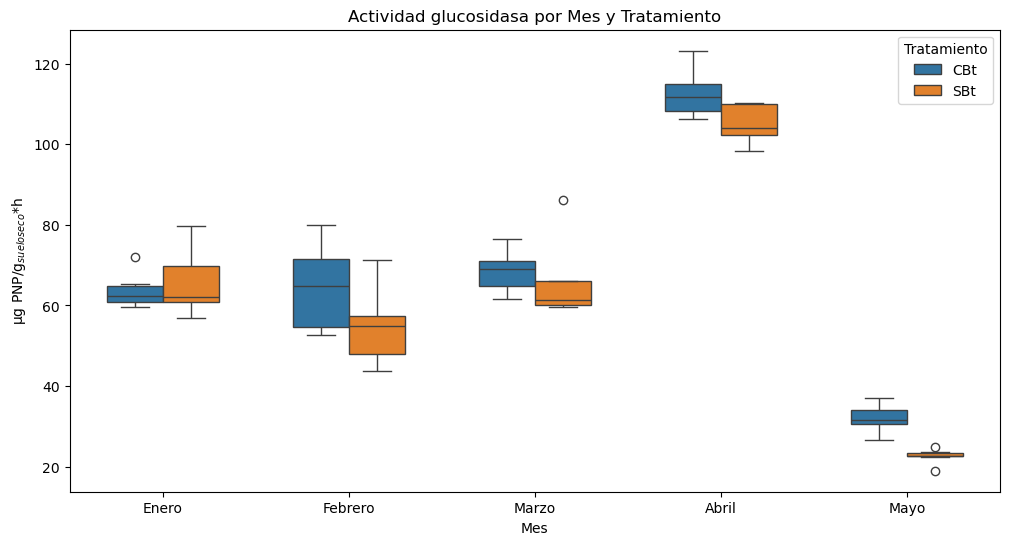

In [8]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(data=tola, x='Mes', y='Glucosidasa', hue='Tratamiento', dodge = True, width = 0.6) 

def my_formatter(x, _): 
    return tola['Mes'].unique()[int(x) % len(tola['Mes'].unique())] 
plt.gca().xaxis.set_major_formatter(FuncFormatter(my_formatter))

# Personalizar el gráfico 
plt.title('Actividad glucosidasa por Mes y Tratamiento')
plt.xlabel('Mes') 
plt.ylabel('µg PNP/g$_{sueloseco}$*h') 
plt.legend(title='Tratamiento') 
plt.show()

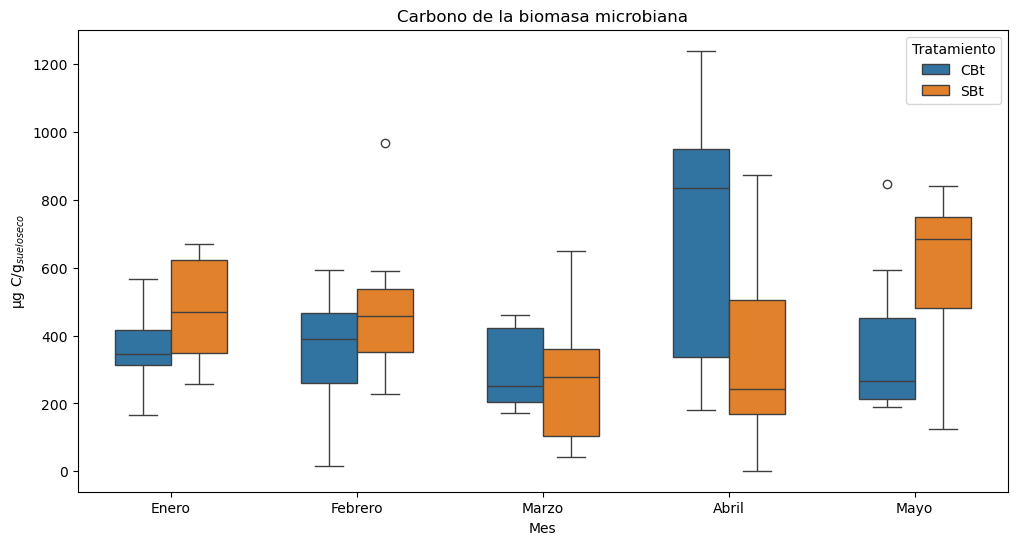

In [9]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(data=tola, x='Mes', y='MBC', hue='Tratamiento', dodge = True, width = 0.6) 
 
def my_formatter(x, _): 
    return tola['Mes'].unique()[int(x) % len(tola['Mes'].unique())] 
plt.gca().xaxis.set_major_formatter(FuncFormatter(my_formatter))

# Personalizar el gráfico 
plt.title('Carbono de la biomasa microbiana')
plt.xlabel('Mes') 
plt.ylabel('µg C/g$_{suelo seco}$') 
plt.legend(title='Tratamiento') 
plt.show()

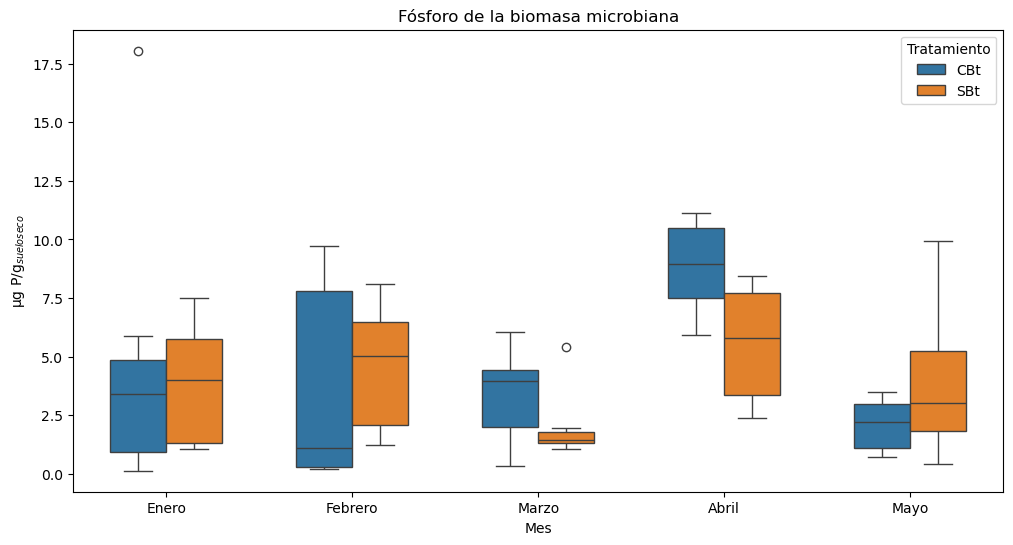

In [10]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(data=tola, x='Mes', y='MBP', hue='Tratamiento', dodge = True, width = 0.6) 

def my_formatter(x, _): 
    return tola['Mes'].unique()[int(x) % len(tola['Mes'].unique())] 
plt.gca().xaxis.set_major_formatter(FuncFormatter(my_formatter))

# Personalizar el gráfico 
plt.title('Fósforo de la biomasa microbiana')
plt.xlabel('Mes') 
plt.ylabel('µg P/g$_{suelo seco}$') 
plt.legend(title='Tratamiento') 
plt.show()

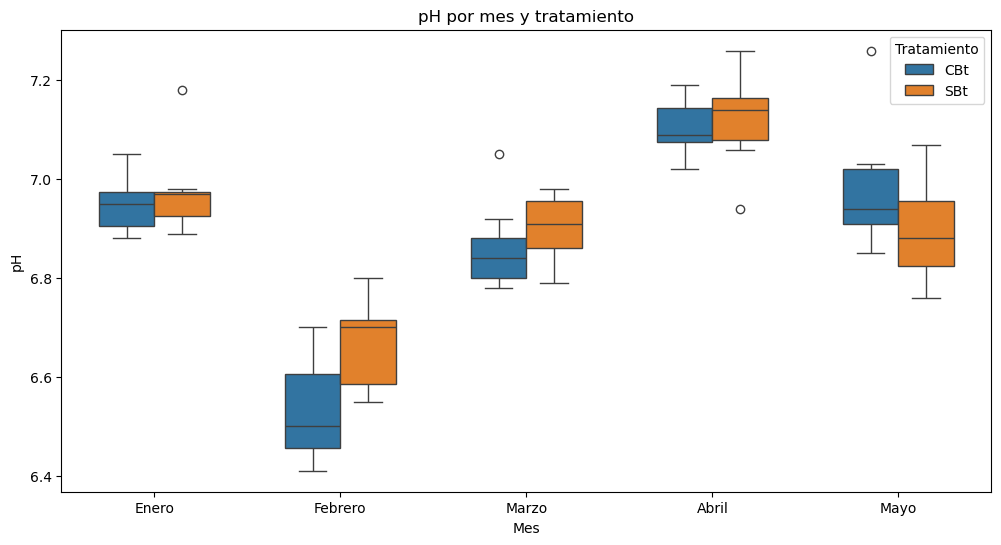

In [11]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(data=tola, x='Mes', y='pH', hue='Tratamiento', dodge = True, width = 0.6) 

def my_formatter(x, _): 
    return tola['Mes'].unique()[int(x) % len(tola['Mes'].unique())] 
plt.gca().xaxis.set_major_formatter(FuncFormatter(my_formatter))

# Personalizar el gráfico 
plt.title('pH por mes y tratamiento')
plt.xlabel('Mes') 
plt.ylabel('pH') 
plt.legend(title='Tratamiento') 
plt.show()

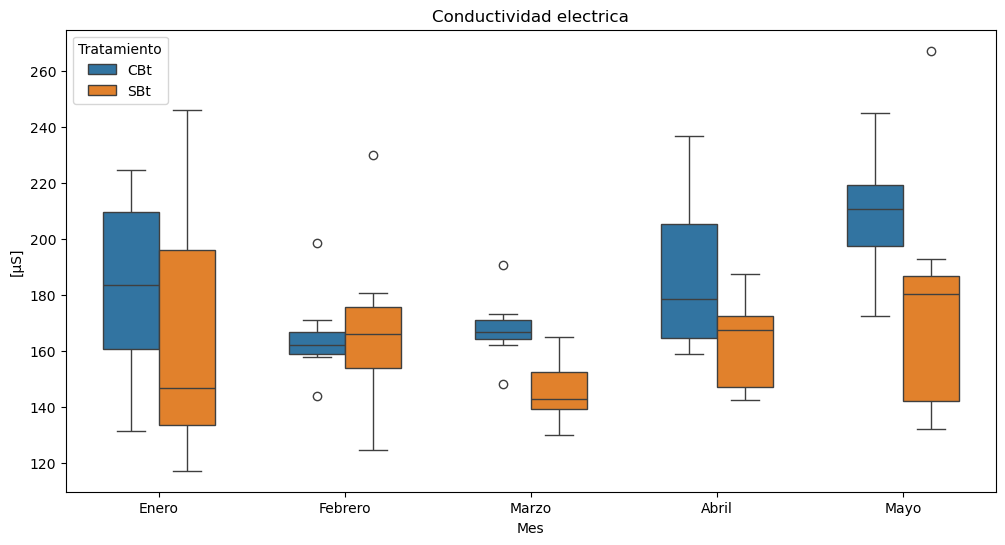

In [12]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(data=tola, x='Mes', y='CE', hue='Tratamiento', dodge = True, width = 0.6) 

def my_formatter(x, _): 
    return tola['Mes'].unique()[int(x) % len(tola['Mes'].unique())] 
plt.gca().xaxis.set_major_formatter(FuncFormatter(my_formatter))

# Personalizar el gráfico 
plt.title('Conductividad electrica')
plt.xlabel('Mes') 
plt.ylabel('[µS]') 
plt.legend(title='Tratamiento') 
plt.show()

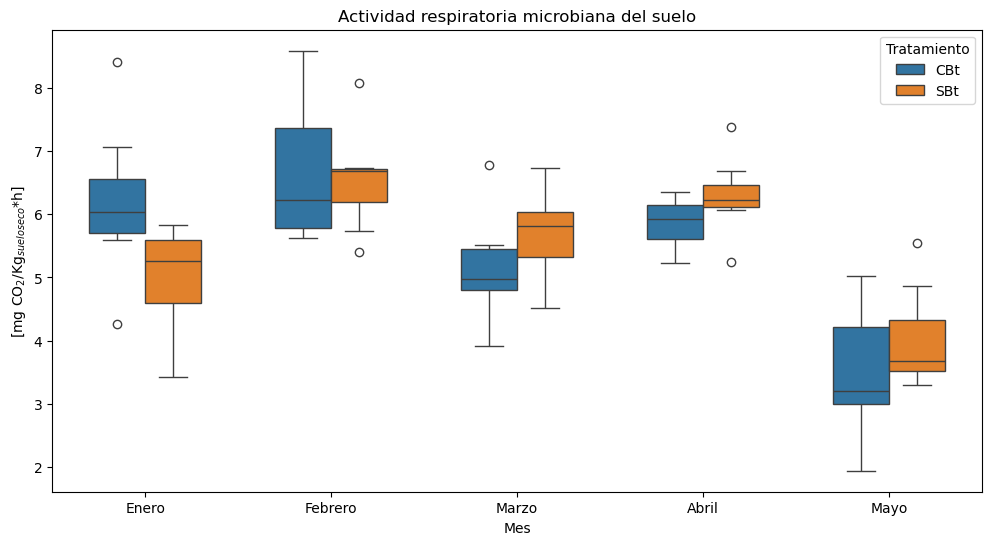

In [13]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(data=tola, x='Mes', y='Respirometria', hue='Tratamiento', dodge = True, width = 0.6) 

def my_formatter(x, _): 
    return tola['Mes'].unique()[int(x) % len(tola['Mes'].unique())] 
plt.gca().xaxis.set_major_formatter(FuncFormatter(my_formatter))

# Personalizar el gráfico 
plt.title('Actividad respiratoria microbiana del suelo')
plt.xlabel('Mes') 
plt.ylabel('[mg CO$_{2}$/Kg$_{suelo seco}$*h]') 
plt.legend(title='Tratamiento') 
plt.show()

## En esta seccion pongo dos graficos para visualizar las correlaciones entre las diferentes variables y valores p que vienen de un test de correlacion tal como hize en mi tesis.

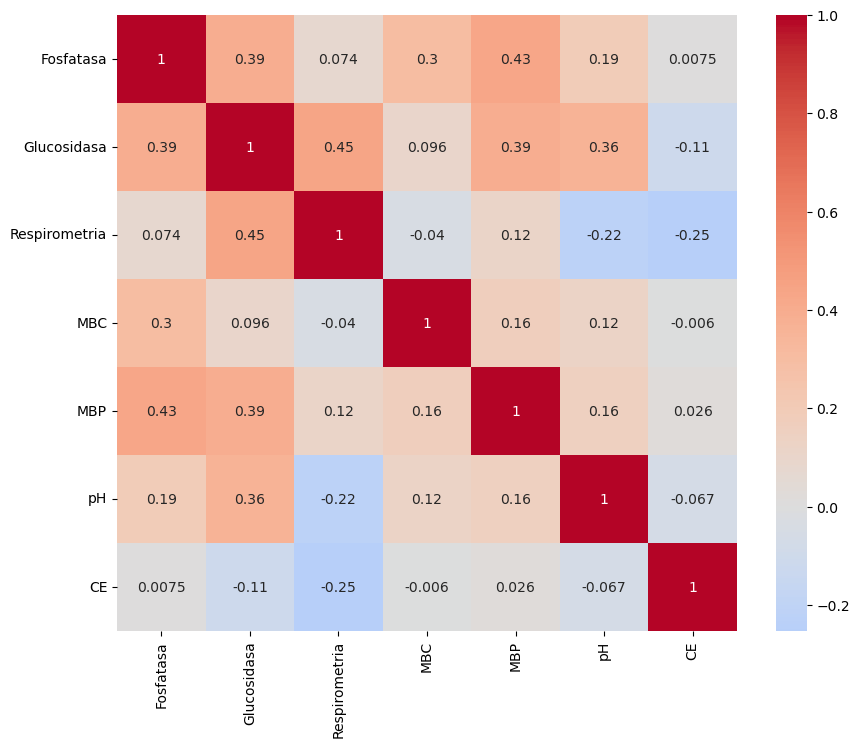

In [14]:
# En mi base de datos 'tola

# Selecciono las variables específicas
selected_vars = ['Fosfatasa', 'Glucosidasa', 'Respirometria', 'MBC', 'MBP', 'pH', 'CE']  # Reemplaza con los nombres de las variables que desees

# Creo un DataFrame solo con las variables seleccionadas
selected_df = tola[selected_vars]

# Calcular la matriz de correlación para las variables seleccionadas
correlation_matrix = selected_df.corr()

# Tamaño del grafico
plt.figure(figsize=(10, 8))

# Matriz de correlacion en mapas de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Mostrar el gráfico
plt.show()

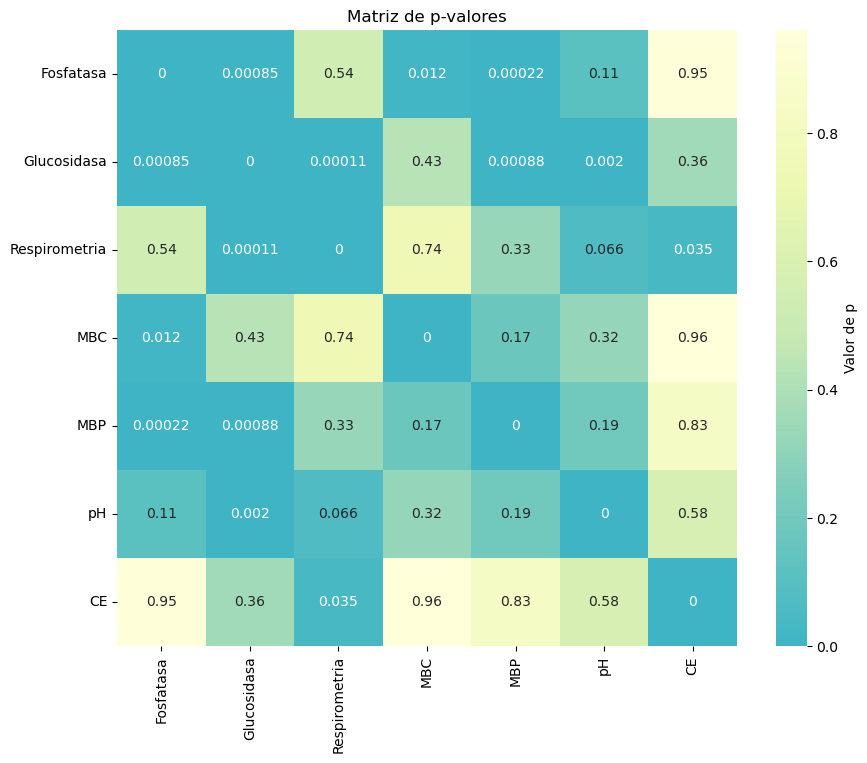

In [15]:
# Para una matriz de valores de p segun test de correlacion

# Seleccionar variables específicas
selected_vars = ['Fosfatasa', 'Glucosidasa', 'Respirometria', 'MBC', 'MBP','pH','CE']  # Reemplaza con los nombres de las variables que desees
selected_df = tola[selected_vars]

# Crear una matriz para los p-valores
p_values_matrix = cs.DataFrame(np.zeros((len(selected_vars), len(selected_vars))), columns=selected_vars, index=selected_vars)

# Calcular los p-valores para cada par de variables
for i in range(len(selected_vars)):
    for j in range(len(selected_vars)):
        if i != j:
            _, p = pearsonr(selected_df[selected_vars[i]], selected_df[selected_vars[j]])
            p_values_matrix.iloc[i, j] = p

# Tamaño del grafico
plt.figure(figsize=(10, 8))

# Mapa de calor con la matriz de p-valores
sns.heatmap(p_values_matrix, annot=True, cmap='YlGnBu_r', center=0.01, cbar_kws={'label': 'Valor de p'})
plt.title('Matriz de p-valores')
# Mostrar 
plt.show()

## Para realizar un estadistico primero verifico si mis datos cumplen los supuestos de normalidad y homogeneidad de varianza mediante Shapíro-Wilk y prueba de levene.

In [16]:
# Prueba de normalidad y homogeneidad de varianzas
# Hacer una lista y almacenar los resultados
normality_results = []
homogeneity_results = []

# Obtener los nombres de las variables numéricas
variables_numericas = tola.select_dtypes(include=['float64', 'int64']).columns

# Normalidad y homogeneidad para cada variable
for variable in variables_numericas:
    # Prueba de Shapiro-Wilk para la normalidad
    stat, p_shapiro = shapiro(tola[variable])
    normality_results.append({'Variable': variable, 'Statistic': stat, 'p-value': p_shapiro})
    
    # Prueba de Levene para la homogeneidad (considerando grupos de tratamiento)
    stat, p_levene = levene(tola[tola['Tratamiento'] == 'CBt'][variable], tola[tola['Tratamiento'] == 'SBt'][variable])
    homogeneity_results.append({'Variable': variable, 'Statistic': stat, 'p-value': p_levene})

# Pasar los resultados a un DataFrame 
normality_df = cs.DataFrame(normality_results)
homogeneity_df = cs.DataFrame(homogeneity_results)
# Aplico una condicion para marcar la tabla cuando p>0.05, a sido necesario instalar Jinja2 para condicionar dataframes
def highlight_pval(val):
    color = 'yellow' if val > 0.05 else ''
    return f'background-color: {color}'
# Aplicar el estilo condicional a la columna 'p-value' de ambas tablas
styled_normality_df = normality_df.style.applymap(highlight_pval, subset=['p-value'])
styled_homogeneity_df = homogeneity_df.style.applymap(highlight_pval, subset=['p-value'])
# Mostrar resultados de test de normalidad
styled_normality_df

/tmp/ipykernel_1611/7631391.py:27: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_normality_df = normality_df.style.applymap(highlight_pval, subset=['p-value'])
/tmp/ipykernel_1611/7631391.py:28: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_homogeneity_df = homogeneity_df.style.applymap(highlight_pval, subset=['p-value'])


,Variable,Statistic,p-value
0,Nro,0.955012,0.013384
1,Fosfatasa,0.976584,0.213319
2,Glucosidasa,0.940085,0.002270
3,Respirometria,0.975219,0.179268
4,MBC,0.948594,0.006124
5,MBP,0.893283,0.000021
6,pH,0.966296,0.056266
7,CE,0.940892,0.002488


In [17]:
# Mostrar el resultado de test de homogeneidad de varianzas
styled_homogeneity_df

,Variable,Statistic,p-value
0,Nro,0.000000,1.000000
1,Fosfatasa,0.069286,0.793175
2,Glucosidasa,0.087973,0.767674
3,Respirometria,0.362669,0.549031
4,MBC,0.230556,0.632653
5,MBP,2.294938,0.134431
6,pH,0.862611,0.356294
7,CE,0.152771,0.697123


### Ahora en esta parte hago una prueba no parametrica de U-mann Whitnney dado que la mayoria de los datos no cumplen con los supuestos de normalidad y homogeneidad de varianzas dado que los valores de p > 0.05 
- Por tanto mis datos no cumplen con los supuestos y busque un codigo que me permita realizar la prueba de U-Mann Whitnney 
buscando diferencias significativas entre cada tratamiento por cada mes para cada variable medida.

In [18]:
# En mi base de datos tola considero Tratamiento y Mes y las variables numéricas
# Almacenar los resultados
results = []
# Obtengo el registro de meses unicos
meses_unicos = tola['Mes'].unique()
# Obtengo el el tipo de variables numericas
variables_numericas = tola.select_dtypes(include=['float64', 'int64']).columns
# Estadistico de U-Mann-Whitney para cada mes y cada variable en funcion del tratamiento
for mes in meses_unicos:
    for variable in variables_numericas:
        # Filtrar el DataFrame segun la columna 'Mes'
        df_mes = tola[tola['Mes'] == mes]
        
        # Obtener los valores de tratamiento CBt y tratamiento SBt
        tratamiento_a = df_mes[df_mes['Tratamiento'] == 'CBt'][variable]
        tratamiento_b = df_mes[df_mes['Tratamiento'] == 'SBt'][variable]
        
        # Realizar la prueba de U-Mann-Whitney 
        stat, p = mannwhitneyu(tratamiento_a, tratamiento_b)
        
        # Almacenar el resultado en una lista
        results.append({'Mes': mes, 'Variable': variable, 'Statistic': stat, 'p-value': p})
# Convertir los resultados a un DataFrame 
results_df = cs.DataFrame(results)

# Función para aplicar estilos condicionales 
def highlight_pval(val):
    color = 'red' if val < 0.05 else ''
    return f'background-color: {color}'

# Aplicar el estilo condicional a la columna 'p-value'
styled_results_df = results_df.style.applymap(highlight_pval, subset=['p-value'])
# Mostrar los resultados 
styled_results_df

/tmp/ipykernel_1611/2771411772.py:32: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_results_df = results_df.style.applymap(highlight_pval, subset=['p-value'])


,Mes,Variable,Statistic,p-value
0,Enero,Nro,0.000000,0.000583
1,Enero,Fosfatasa,19.000000,0.534965
2,Enero,Glucosidasa,23.000000,0.901515
3,Enero,Respirometria,41.000000,0.037879
4,Enero,MBC,15.000000,0.259324
5,Enero,MBP,20.000000,0.620047
6,Enero,pH,20.000000,0.608095
7,Enero,CE,31.000000,0.455711
8,Febrero,Nro,0.000000,0.000583
9,Febrero,Fosfatasa,25.000000,1.000000


## Para verificar que mas puedo aprovechar de esta base de datos, me parecio adecuado hacer un PCA como analisis exploratorio

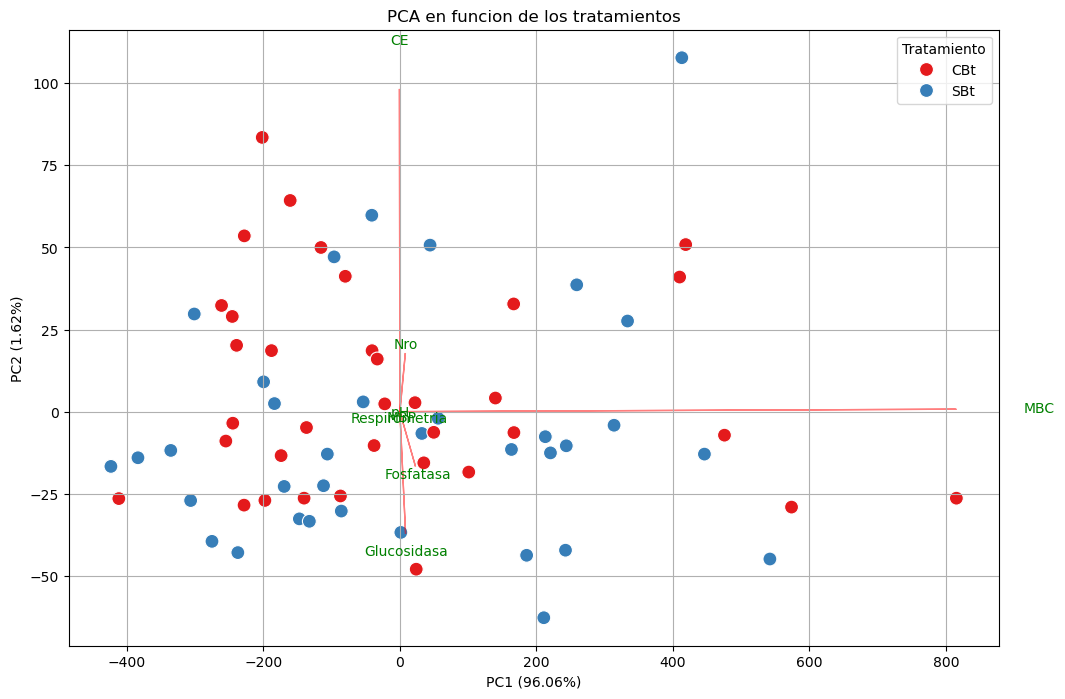

          Nro  Fosfatasa  Glucosidasa  Respirometria       MBC       MBP  \
PC1  0.009800   0.027950     0.010224      -0.000203  0.999506  0.002232   
PC2  0.165038  -0.154158    -0.344121      -0.015718  0.006948 -0.012921   

           pH        CE  
PC1  0.000091 -0.000778  
PC2 -0.000803  0.911107  


In [19]:
# Tola con 'Tratamiento' y 'Mes', y variables numéricas

# Seleccionar solo las variables numéricas para el PCA
variables_numericas = tola.select_dtypes(include=['float64', 'int64'])

# Realizar el PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(variables_numericas)

# Crear un DataFrame con los resultados del PCA
pca_df = cs.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Tratamiento'] = tola['Tratamiento']

# Obtener el porcentaje de varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_ * 100

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))

# Graficar los puntos del PCA, coloreados por tratamiento y agrupados en círculos
sns.scatterplot(x='PC1', y='PC2', hue='Tratamiento', data=pca_df, palette='Set1', s=100)

# Añadir las flechas para las variables
for i, var in enumerate(variables_numericas.columns):
    plt.arrow(0, 0, pca.components_[0, i] * np.max(pca_result[:, 0]), pca.components_[1, i] * np.max(pca_result[:, 1]), 
              color='r', alpha=0.5, head_width=0.05)
    plt.text(pca.components_[0, i] * np.max(pca_result[:, 0]) * 1.15, pca.components_[1, i] * np.max(pca_result[:, 1]) * 1.15, 
             var, color='g', ha='center', va='center')

# Poner titulo a los ejes
plt.xlabel(f'PC1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2f}%)')
plt.title('PCA en funcion de los tratamientos')
plt.grid()
# Mostrar el gráfico
plt.show()
# Mostrar los componentes principales
print(cs.DataFrame(pca.components_, columns=variables_numericas.columns, index=['PC1', 'PC2']))

## Los resultados que muestra cada figura y cada prueba estadistica ciertamente coinciden con lo que habia reportado, aunque con la dificultad de estar haciendo prueba y error de una variedad de codigos en R.